In [1]:
###########################################
### Sistemas Baseados em Conhecimento
### Notebook: N03 (Modelo Oculto de Markov)   
###########################################

# EXEMPLO 01, PREVISAO DO TEMPO
## https://www.geeksforgeeks.org/hidden-markov-model-in-machine-learning/

#!pip install hmmlearn

import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from hmmlearn import hmm

In [2]:
## (1) Defina o espaço de estados e o espaço de observações
#############

# Espaco de estados 
states = ["Ensolarado", "Chuvoso"] 
n_states = len(states) 
print('Quantidade de estados escondidos :',n_states) 

# Espaco das observacoes
observations = ["Seco", "Umido"] 
n_observations = len(observations) 
print('Quantidade de possiveis observacoes:',n_observations)

Quantidade de estados escondidos : 2
Quantidade de possiveis observacoes: 2


In [3]:
## (2) Defina a distribuição do estado inicial
#############

state_probability = np.array([0.6, 0.4]) 
print("State probability: ", state_probability) 


State probability:  [0.6 0.4]


In [4]:
## (3) Defina a probabilidade das transições de estado ["Ensolarado", "Chuvoso"]
#############

transition_probability = np.array([[0.7, 0.3], 
                                   [0.3, 0.7]]) 
print("\nProbabilidade de transicao:\n", transition_probability) 


Probabilidade de transicao:
 [[0.7 0.3]
 [0.3 0.7]]


In [5]:
## (4) Define a probabilidade de uma observação dada um estado 
######### ["Ensolarado", "Chuvoso"] x ["Seco", "Umido"]
#############

emission_probability= np.array([[0.9, 0.1], 
                                [0.2, 0.8]]) 
print("\nProbabilidade do estado dada uma observacao:\n", emission_probability)


Probabilidade do estado dada uma observacao:
 [[0.9 0.1]
 [0.2 0.8]]


In [6]:
## (5) Crie o modelo
#############

model = hmm.CategoricalHMM(n_components=n_states) 
model.startprob_ = state_probability 
model.transmat_ = transition_probability 
model.emissionprob_ = emission_probability

In [7]:
## (6) Dada uma observação, retorne a sequência mais provável de estados escondidos
#############

# [seco, umido, seco, umido, seco, seco] 
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1) 

##hidden_states = model.predict(observations_sequence)
log_probability, hidden_states = model.decode(observations_sequence, 
                                              lengths = len(observations_sequence), 
                                              algorithm ='viterbi' ) 

print('Log Probability :',log_probability)
print('Probability: ', 1 / (1 + math.exp(-log_probability)) )
print("Most likely hidden states:", hidden_states)

Log Probability : -6.360602626270058
Probability:  0.0017253429109480832
Most likely hidden states: [0 1 1 1 0 0]


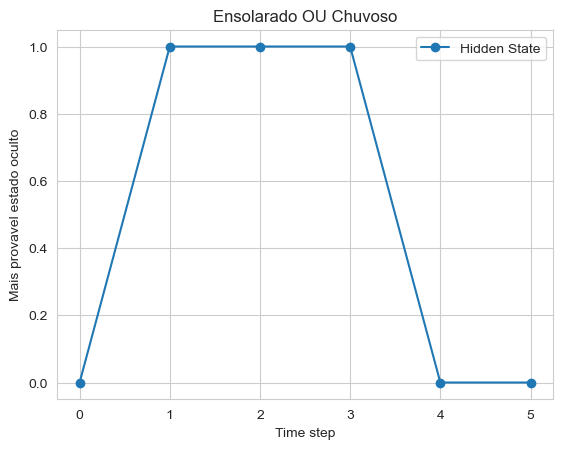

In [9]:
## (7) Avalie o modelo
#############

sns.set_style("whitegrid") 
plt.plot(hidden_states, '-o', label="Hidden State") 
plt.xlabel('Time step') 
plt.ylabel('Mais provavel estado oculto') 
plt.title("Ensolarado OU Chuvoso") 
plt.legend() 
plt.show()

In [10]:
# EXEMPLO 02, RECONHECIMENTO DE CARACTER
## Dado um dataset de caracteres escrito a mao, o objetivo eh reconhecer o caracter baseado na forma como ele eh escrito

# Bibliotecas 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from hmmlearn import hmm 

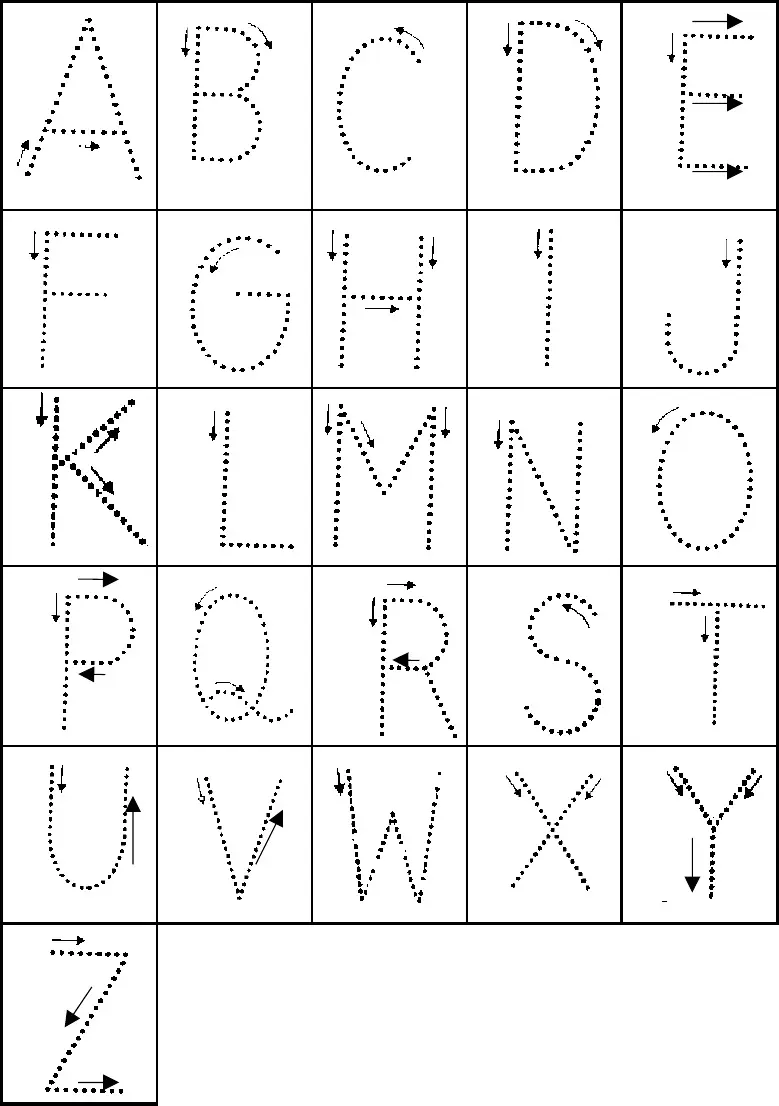

In [11]:
## (1) Defina o espaço de estados e o espaço de observações
#############
  
# Espaco de estados
states = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", 
          "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"] 
n_states = len(states) 
  
# Espaco de observacoes
observations = ["up", "down", "left", "right", "up-right", "down-right", 
                "down-left", "up-left"] 
n_observations = len(observations) 

In [13]:
## (2) Defina a distribuição do estado inicial
#############

# Funcao que cria um array de 26 probabilidades, com somatorio = 1
start_probability = np.random.dirichlet(np.ones(26),size=(1))[0]
start_probability

array([5.50149674e-03, 3.76692643e-02, 1.29304248e-01, 2.46492239e-02,
       5.39585122e-02, 2.80915126e-02, 5.81852835e-02, 2.44142189e-03,
       3.62238048e-02, 1.47898846e-02, 8.02346242e-03, 4.73547406e-02,
       2.55742685e-02, 5.86824791e-02, 3.00218907e-02, 2.19361607e-02,
       6.80287637e-05, 9.88431681e-02, 6.84207020e-02, 6.25926302e-02,
       1.24994512e-02, 2.12574808e-02, 1.05650034e-01, 2.27959741e-02,
       1.65280700e-02, 8.93680532e-03])

In [15]:
## (3) Defina a probabilidade das transições de estado
#############

#  Array de 26×26 representando a probabiliadde da transicao de um caracter. 
# Soma dos 26 valores tambem eh 1
transition_probability = np.random.dirichlet(np.ones(26),size=(26))

In [16]:
## (4) Define a probabilidade de uma observacao dado um estado
############

# 26×8 array representando a probabilidade de gerar uma observacao dada um caracter.
emission_probability = np.random.dirichlet(np.ones(8),size=(26)) 

In [17]:
len(emission_probability[0])

8

In [18]:
## (5) Crie o modelo
#############

model = hmm.CategoricalHMM(n_components=n_states) 
model.startprob_ = start_probability 
model.transmat_ = transition_probability 
model.emissionprob_ = emission_probability 

In [19]:
## (6) Dada uma observação, retorne a sequência mais provável de estados escondidos
#############

# ["up", "down", "left", "down", "up", "down", "left", "right", "left", "down", "left"]
observations_sequence = np.array([0, 1, 2, 1, 0, 1, 2, 3, 2, 1, 2]).reshape(-1, 1) 
  
# Predict the most likely hidden states 
hidden_states = model.predict(observations_sequence) 
print("Most likely hidden states:", hidden_states) 

Most likely hidden states: [22  8 21 20  3  8 21  4 24  7 21]


In [ ]:
# Plot the results 
sns.set_style("whitegrid") 
plt.plot(hidden_states, '-o', label="Hidden State") 
plt.xlabel('Traco') 
plt.ylabel('Mais provavel estado oculto') 
plt.title("Estado oculto previsto") 
plt.legend() 
plt.show()

In [ ]:
# EXEMPLO 03, RECONHECIMENTO DA PALAVRA FALADA EM AUDIO
## Dado um dataset com gravacoes de audio, o objetivo eh reconhecer as palavras faladas na gravacao 

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from hmmlearn import hmm 

In [ ]:
## (1) Defina o espaço de estados e o espaço de observações
#############

# espaco de estados
states = ["Word0", "Word1", "Word2", "Word3"] 
n_states = len(states)

# espaco de observacoes
observations = ["Oral", "Nasal"] 
n_observations = len(observations)

In [ ]:
## (2) Defina a distribuição do estado inicial
#############

start_probability = np.array([0.8, 0.1, 0.1, 0.0])

In [ ]:
## (3) Defina a probabilidade das transições de estado
#############

transition_probability = np.array([[0.7, 0.2, 0.1, 0.0], 
                                   [0.0, 0.6, 0.4, 0.0], 
                                   [0.0, 0.0, 0.6, 0.4], 
                                   [0.0, 0.0, 0.0, 1.0]]) 

In [ ]:
## (4) Defina a probabilidade de uma observação dada um estado
############

emission_probability = np.array([[0.7, 0.3], 
                                 [0.4, 0.6],
                                 [0.6, 0.4],
                                 [0.3, 0.7]]) 

In [ ]:
## (5) Crie o modelo
############

# Fit the model 
model = hmm.CategoricalHMM(n_components=n_states) 
model.startprob_ = start_probability 
model.transmat_ = transition_probability 
model.emissionprob_ = emission_probability 

In [ ]:
## (6) Dada uma observação, retorne a sequência mais provável de estados escondidos
#############

# [Oral, Nasal, Oral, Oral, Nasal, Nasal, Oral, Nasal]
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1) 

hidden_states = model.predict(observations_sequence) 
print("Mais provaveis estados ocultos:", hidden_states) 

In [ ]:
## (6) Avalie o modelo
#############

# Plot the results 
sns.set_style("darkgrid") 
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Som')
plt.ylabel('Mais provavel estado oculto') 
plt.title("Estado oculto previsto") 
plt.legend() 
plt.show() 
